## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import io

from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [3]:
# Read charity data into dataframe

application_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns='EIN')
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_name_counts = application_df['NAME'].value_counts()
application_name_counts


PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [7]:
# Definte list of application names to replace
application_names_to_replace = application_name_counts[application_name_counts < 100].index.to_list()

# Replace in dataframe
for app in application_names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

application_names_to_replace

['AIR FORCE ASSOCIATION',
 'WORKERS UNITED',
 'GAMMA THETA UPSILON',
 'INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS',
 'SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES',
 'ROTARY INTERNATIONAL',
 'CALIFORNIA GARDEN CLUBS INC',
 'SWEET ADELINES INTERNATIONAL',
 'DISABLED AMERICAN VETERANS',
 'KLEIN SUPPORT GROUPS INC',
 'CLEARCREEK I S D SUPPORT GROUPS',
 'VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC',
 'DEPARTMENT OF KANSAS LADIES AUXILIARY TO THE VFW OF THE US INC',
 'CISD EDUCATIONAL SUPPORT GROUPS INC',
 'SONS OF CONFEDERATE VETERANS INC',
 'SLOW FOOD USA INC',
 'NATIONAL YOUNG MENS SERVICE LEAGUE',
 'AMATEUR ATHLETIC UNION OF THE UNITED STATES',
 'LAMBDA THETA ALPHA',
 'UNITED FEDERATION OF DOLL CLUBS INC',
 'UNIVERSITY OF FLORIDA',
 'AMERICAN YOUTH FOOTBALL INC',
 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION INC',
 'INTERNATIONAL MOUNTAIN BICYCLING ASSOCIATION - COLORADO',
 'MARINE CORPS LEAGUE',
 'CLEAR CREEK ISD GROUPS',
 'DEPARTMENT OF

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
application_types_to_replace = application_type_counts[application_type_counts < 100].index.to_list()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 100].index.to_list()


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [13]:
categorical_columns = application_df.select_dtypes('object').columns.to_list()

categorical_columns


['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`

application_df = pd.get_dummies(application_df, columns=categorical_columns)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-15-8b3210d18e20>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop("IS_SUCCESSFUL",1).values


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                984       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,309
Trainable params: 1,309
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5519 - accuracy: 0.7124
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4979 - accuracy: 0.7516
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4913 - accuracy: 0.7562
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4884 - accuracy: 0.7580
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4865 - accuracy: 0.7600
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4853 - accuracy: 0.7594
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4843 - accuracy: 0.7611
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4838 - accuracy: 0.7622
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4830 - accuracy: 0.7619
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4822 - accura

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4973 - accuracy: 0.7517 - 653ms/epoch - 2ms/step
Loss: 0.4973186254501343, Accuracy: 0.751720130443573


<AxesSubplot:>

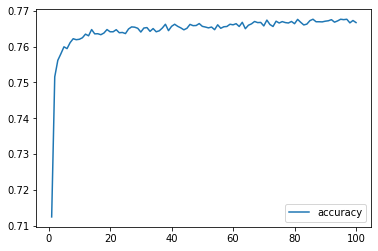

In [22]:
111# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')